<a href="https://colab.research.google.com/github/AlexandreMachineLearning/Classifica-o-Naive-Bayes/blob/main/Q3_Classificacao_Naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Use naive-bayes, com validação holdout, para descobrir a acurácia media dos conjuntos de treino e validação nos dados no arquivo classificacao_Q3.csv. O tamanho do conjunto de validação é 500.


Passo 1 - Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Passo 2 - Criação e Carregamento do dataframe

In [2]:
classificacao_naive_df=pd.read_csv('/content/classificacao_Q3.csv')

In [3]:
classificacao_naive_df

,Genero,Idade,Escolaridade,Profissao,Target
0,F,a - Ate 25 anos,Fundamental,b,0
1,M,a - Ate 25 anos,Medio,d,1
2,F,c - 36 a 45 anos,Fundamental,a,1
3,M,d - 46 a 55 anos,Fundamental,a,0
4,F,c - 36 a 45 anos,Fundamental,b,1
...,...,...,...,...,...
995,F,a - Ate 25 anos,Superior,a,0
996,F,c - 36 a 45 anos,Fundamental,d,1
997,M,b - 26 a 35 anos,Medio,b,1
998,M,b - 26 a 35 anos,Fundamental,a,1


In [4]:
classificacao_naive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Genero        1000 non-null   object
 1   Idade         1000 non-null   object
 2   Escolaridade  1000 non-null   object
 3   Profissao     1000 non-null   object
 4   Target        1000 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


Passo 3 - Separação dos dados e conversão dos dados categóricos

In [5]:
X_classificacao_naive=classificacao_naive_df.iloc[:,0:4].values

In [6]:
X_classificacao_naive

array([['F', 'a - Ate 25 anos ', 'Fundamental', 'b'],
       ['M', 'a - Ate 25 anos ', 'Medio', 'd'],
       ['F', 'c - 36 a 45 anos', 'Fundamental', 'a'],
       ...,
       ['M', 'b - 26 a 35 anos', 'Medio', 'b'],
       ['M', 'b - 26 a 35 anos', 'Fundamental', 'a'],
       ['F', 'b - 26 a 35 anos', 'Medio', 'c']], dtype=object)

In [8]:
y_classificacao_naive=classificacao_naive_df.iloc[:,4].values

In [9]:
y_classificacao_naive

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder_Genero = LabelEncoder()
label_encoder_Idade = LabelEncoder()
label_encoder_Escolaridade = LabelEncoder()
label_encoder_Profissao = LabelEncoder()

In [11]:
X_classificacao_naive[:,0]=label_encoder_Genero.fit_transform(X_classificacao_naive[:,0])
X_classificacao_naive[:,1]=label_encoder_Idade.fit_transform(X_classificacao_naive[:,1])
X_classificacao_naive[:,2]=label_encoder_Escolaridade.fit_transform(X_classificacao_naive[:,2])
X_classificacao_naive[:,3]=label_encoder_Profissao.fit_transform(X_classificacao_naive[:,3])

In [12]:
X_classificacao_naive

array([[0, 0, 0, 1],
       [1, 0, 1, 3],
       [0, 2, 0, 0],
       ...,
       [1, 1, 1, 1],
       [1, 1, 0, 0],
       [0, 1, 1, 2]], dtype=object)

Passo 4 - Separação dos dados de treinamento e teste

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_naive_treinamento, X_naive_teste, y_naive_treinamento, y_naive_teste = train_test_split(X_classificacao_naive, y_classificacao_naive, test_size = 0.50)

In [15]:
X_naive_treinamento.shape

(500, 4)

In [16]:
y_naive_treinamento.shape

(500,)

In [17]:
X_naive_teste.shape

(500, 4)

In [18]:
y_naive_teste.shape

(500,)

In [19]:
from sklearn.naive_bayes import GaussianNB

Passo 5 - Previsões

In [20]:
naive_classificacao_data = GaussianNB()
naive_classificacao_data.fit(X_naive_treinamento, y_naive_treinamento)

GaussianNB()

In [21]:
previsoes = naive_classificacao_data.predict(X_naive_teste)

In [22]:
previsoes

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [23]:
y_naive_teste

array([0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Passo 6 - Verificação da acurácia

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [25]:
accuracy_score(y_naive_teste, previsoes)

0.764

In [26]:
confusion_matrix(y_naive_teste, previsoes)

array([[ 40,  71],
       [ 47, 342]])

In [27]:
from yellowbrick.classifier import ConfusionMatrix

0.764

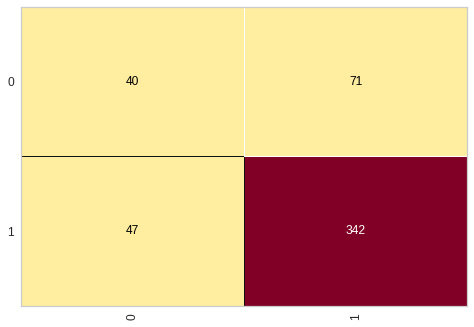

In [28]:
cm = ConfusionMatrix(naive_classificacao_data)
cm.fit(X_naive_treinamento, y_naive_treinamento)
cm.score(X_naive_teste, y_naive_teste)

In [29]:
print(classification_report(y_naive_teste, previsoes))

              precision    recall  f1-score   support

           0       0.46      0.36      0.40       111
           1       0.83      0.88      0.85       389

    accuracy                           0.76       500
   macro avg       0.64      0.62      0.63       500
weighted avg       0.75      0.76      0.75       500

